# REAL AND FAKE NEWS DETECTION 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading and Cleaning Data

In [2]:
true_df=pd.read_csv('True.csv')
fake_df=pd.read_csv('Fake.csv')

C:\Users\abhij\AppData\Local\Temp\ipykernel_1232\2186753718.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_df=pd.read_csv('Fake.csv')


In [3]:
fake_df.shape, true_df.shape

((23502, 172), (21417, 8))

In [4]:
fake_df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
true_df.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,NaN,NaN,NaN,NaN


In [6]:
fake_df.columns, true_df.columns

(Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
        'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
        ...
        'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
        'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
        'Unnamed: 170', 'Unnamed: 171'],
       dtype='object', length=172),
 Index(['title', 'text', 'subject', 'date', 'Unnamed: 4', 'Unnamed: 5',
        'Unnamed: 6', 'Unnamed: 7'],
       dtype='object'))

In [7]:
true_df.info(), fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       21417 non-null  object
 1   text        21417 non-null  object
 2   subject     21417 non-null  object
 3   date        21417 non-null  object
 4   Unnamed: 4  1 non-null      object
 5   Unnamed: 5  1 non-null      object
 6   Unnamed: 6  1 non-null      object
 7   Unnamed: 7  1 non-null      object
dtypes: object(8)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Columns: 172 entries, title to Unnamed: 171
dtypes: object(172)
memory usage: 30.8+ MB


(None, None)

In [8]:
fake_df.isnull().sum(), true_df.isnull().sum()

(title               0
 text                0
 subject            21
 date               21
 Unnamed: 4      23481
                 ...  
 Unnamed: 167    23500
 Unnamed: 168    23500
 Unnamed: 169    23500
 Unnamed: 170    23500
 Unnamed: 171    23500
 Length: 172, dtype: int64,
 title             0
 text              0
 subject           0
 date              0
 Unnamed: 4    21416
 Unnamed: 5    21416
 Unnamed: 6    21416
 Unnamed: 7    21416
 dtype: int64)

▶ In true.csv there is some unnamed columns,so drop them.

▶Also removing the row with no values in the text columns, the text colunm contains the news.

In [9]:
true_df=true_df.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], errors='ignore')


In [10]:
#Removing rows with missing text from fake and real news data
fake_df = fake_df.dropna(subset=['text'])
true_df = true_df.dropna(subset=['text'])

In [11]:
fake_df.isnull().sum(),true_df.isnull().sum()

(title               0
 text                0
 subject            21
 date               21
 Unnamed: 4      23481
                 ...  
 Unnamed: 167    23500
 Unnamed: 168    23500
 Unnamed: 169    23500
 Unnamed: 170    23500
 Unnamed: 171    23500
 Length: 172, dtype: int64,
 title      0
 text       0
 subject    0
 date       0
 dtype: int64)

In [12]:
true_df.duplicated().sum(), fake_df.duplicated().sum()

(206, 13)

In [13]:
#drop duplicate data
true_df.drop_duplicates(inplace=True)
fake_df.drop_duplicates(inplace=True)

In [14]:
true_df.duplicated().sum(), fake_df.duplicated().sum()

(0, 0)

In [15]:
fake_df.shape, true_df.shape

((23489, 172), (21211, 4))

##Combine Data

In [16]:
fake_df['label']=0
true_df['label']=1

In [17]:
data = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

In [18]:
data.shape

(44700, 173)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44700 entries, 0 to 44699
Columns: 173 entries, title to label
dtypes: int64(1), object(172)
memory usage: 59.0+ MB


In [20]:
data.nunique()

title           38740
text            38657
subject            20
date             1028
Unnamed: 4         11
                ...  
Unnamed: 168        1
Unnamed: 169        1
Unnamed: 170        2
Unnamed: 171        1
label               2
Length: 173, dtype: int64

## Cleaning Text

In [21]:
def clean_text(text):   # Define a function to clean text
    if not isinstance(text, str):  # Handle non-string values if any remain
        return ""
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])     # Remove the punctuation and special characters

    #Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

In [22]:
print(data['cleaned_text'].head())

0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: cleaned_text, dtype: object


In [23]:
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')

data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month_name()

In [24]:
data['subject'].unique()

array(['News', 'politics', nan,
       ' of which Soros is a major financier.Mercy Corps: Vis a vis the Arab-Israeli conflict',
       ' high taxes',
       ' Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"',
       'Government News', 'left-news',
       ' claimed that hundreds of alternative media websites were producing  fake news  and  conspiracy  stories and therefore were unreliable as information sources. It wasn t long before the establishment began referencing these politicized lists',
       'US_News', ' and so is Mr. Katzenbach',
       ' fell 5.6 percent Monday. Wynn Resortsslipped 1.2 percent. Las Vegas Sands fell as much as 2.1 percent before closing higher.   LIVE DRILL    Las Vegas has been at the forefront of active shooter training. ( Image Source: sinclairstoryline)Las Vegas Active Shooter Drills Back in 2014',
       ' state systems with outsized pretensions to power have reacted to their environmen

In [25]:
data['subject'] = data['subject'].astype('category')

value_counts = data['subject'].value_counts()
categories_to_remove = value_counts[value_counts == 1].index

data = data[~data['subject'].isin(categories_to_remove)]

# Optionally, update the categories to remove unused ones
data['subject'] = data['subject'].cat.remove_unused_categories()

##Sentimental Analysis

In [26]:
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

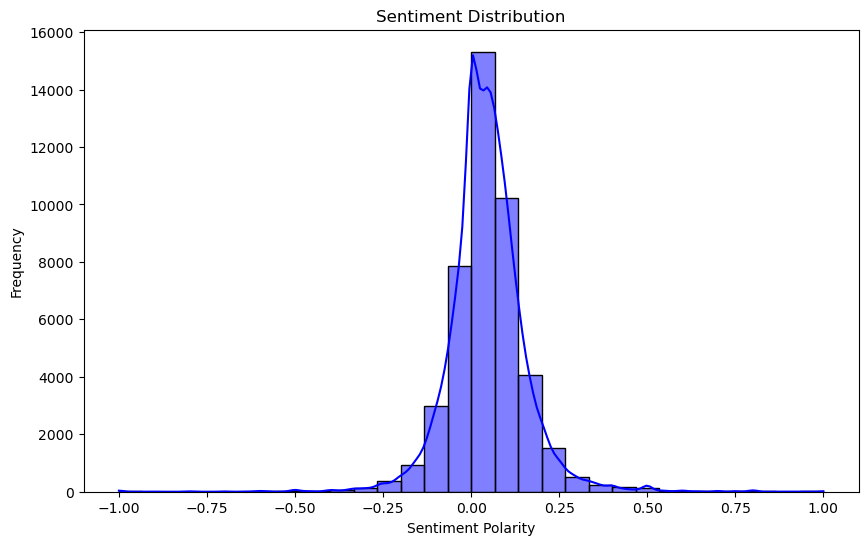

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Sentiment Distribution')

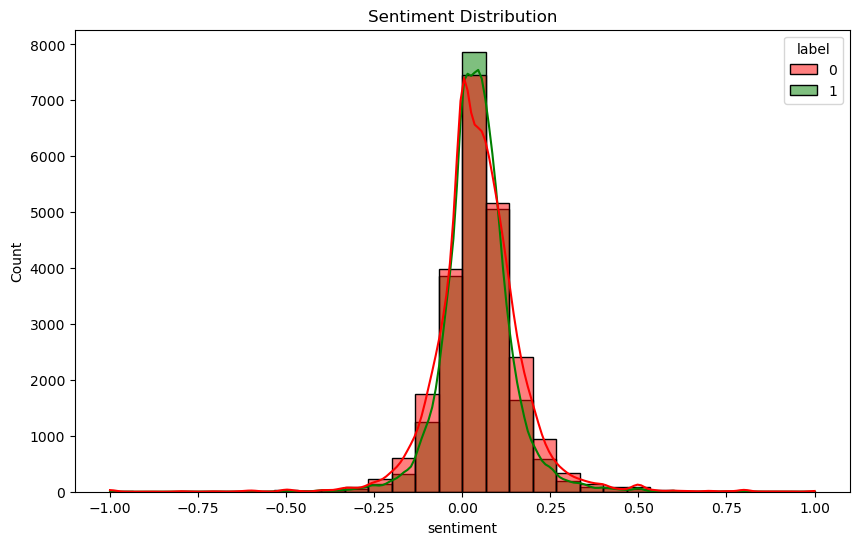

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sentiment', hue='label', bins=30, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Sentiment Distribution')

- Sentiment polarity is centered around neutral (0), with minimal extremes in positive or negative sentiment.
- Most articles avoid emotional bias, typical of news content.
- Sentiment alone may not effectively differentiate fake from real news.

####Interpretation
- The dataset is composed of mostly neutral text, and sentiment analysis alone may not be a strong discriminator between fake and real news.
- Additional features, such as n-gram analysis, metadata (title, subject), or advanced text embeddings (e.g., TF-IDF, BERT), might be required for effective classification

##N-Gram Analysis

In [29]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
#Function for n-grams
def generate_ngrams(text, n=2):
    words = word_tokenize(text)
    n_grams = list(ngrams(words, n))
    return n_grams

#Bigrams for fake and real news
fake_text = ' '.join(data[data['label'] == 0]['cleaned_text'])
real_text = ' '.join(data[data['label'] == 1]['cleaned_text'])

fake_bigrams = generate_ngrams(fake_text, n=2)
real_bigrams = generate_ngrams(real_text, n=2)

In [31]:
fake_bigram_freq = Counter(fake_bigrams)
real_bigram_freq = Counter(real_bigrams)

In [32]:
fake_bigram_df = pd.DataFrame(fake_bigram_freq.most_common(10), columns=['Bigram', 'Frequency'])
real_bigram_df = pd.DataFrame(real_bigram_freq.most_common(10), columns=['Bigram', 'Frequency'])

In [33]:
fake_bigram_df['Bigram'] = fake_bigram_df['Bigram'].astype(str)
real_bigram_df['Bigram'] = real_bigram_df['Bigram'].astype(str)

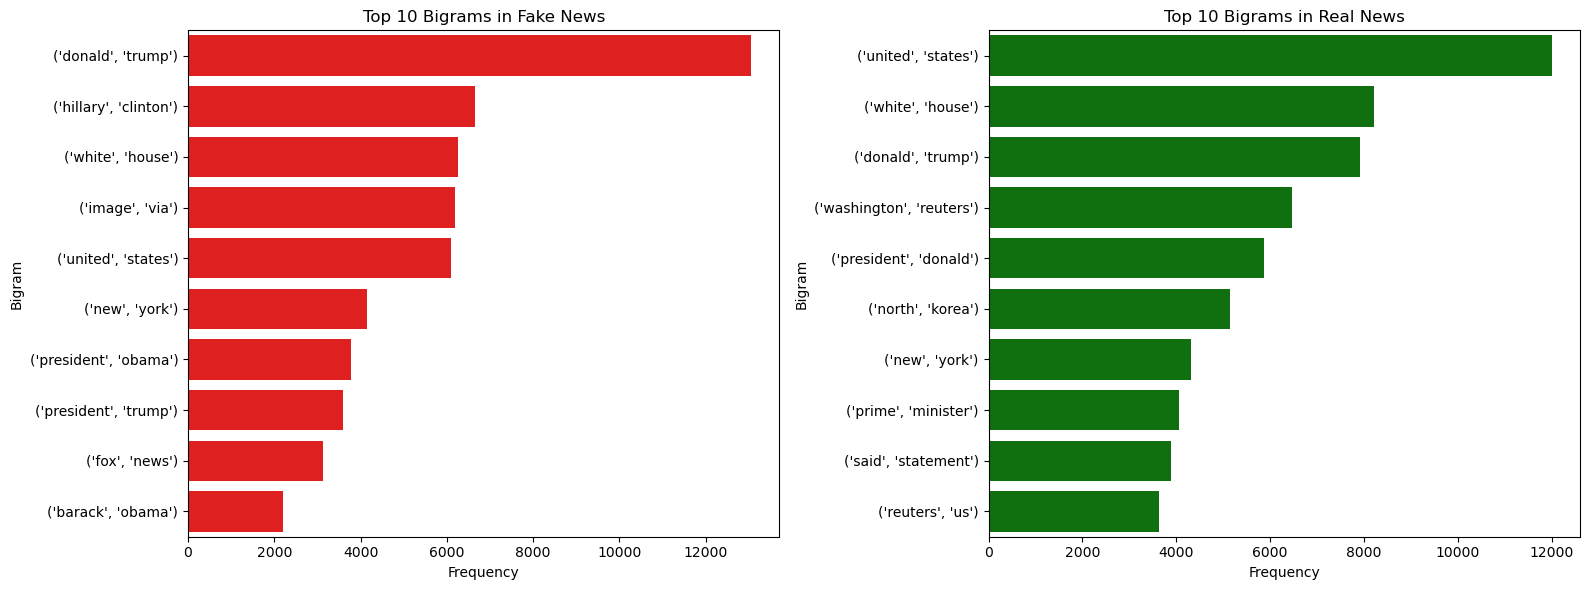

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=fake_bigram_df, x='Frequency', y='Bigram', color='red', ax=axes[0])
axes[0].set_title('Top 10 Bigrams in Fake News')

sns.barplot(data=real_bigram_df, x='Frequency', y='Bigram', color='green', ax=axes[1])
axes[1].set_title('Top 10 Bigrams in Real News')

plt.tight_layout()
plt.show()

Short Interpretation of the Graph:

1.	Fake News (Left Chart):
  
  - Common bigrams include ('donald', 'trump'),('hillary', 'clinton'), and ('white', 'house'), indicating a focus on political figures and institutions.
  -	Terms like ('image', 'via') and ('fox', 'news') suggest the use of media-related terms, which may be indicative of fabricated or manipulated content.
  -  The repetition of political names and institutions highlights biased or sensational reporting.

2.	Real News (Right Chart):

  -	Frequent bigrams such as ('united', 'states') and ('white', 'house') emphasize geopolitical and institutional coverage.
  -	Credible sources (('washington', 'reuters'), ('reuters', 'us')) appear, suggesting the focus on verified information.
  -	Bigram diversity points to broader and factual news coverage compared to fake news.


##Visualization

###Wordcloud

In [35]:
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

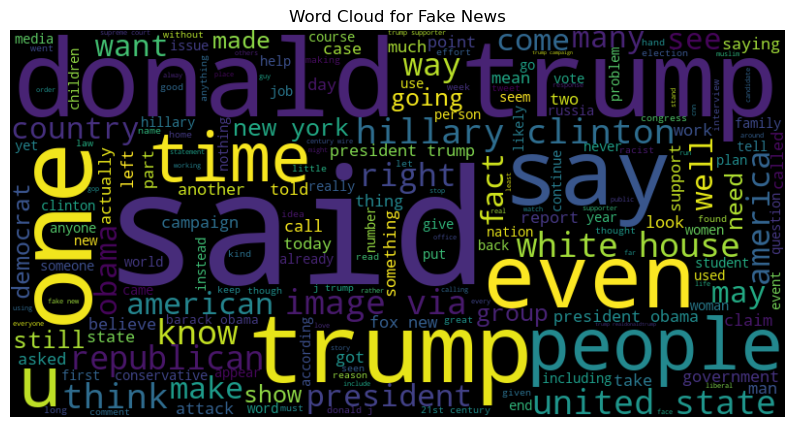

In [36]:
plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()

- Focuses on political figures like Trump and Hillary Clinton with speculative terms like "claim" and "think."
- Emphasizes sensationalism and opinions over facts.

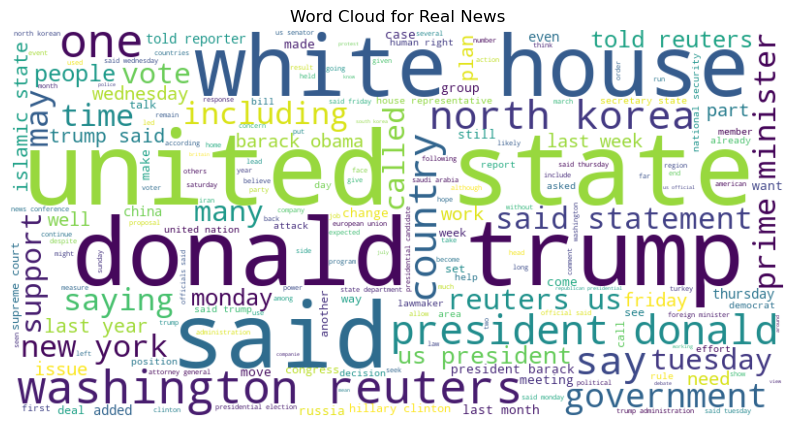

In [37]:
plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()

- Covers verified topics like government actions and global events with terms like "Reuters" and "prime minister."
- Neutral, fact-based language dominates.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

#####comparison of wordcloud

- Fake news uses emotional and speculative words, while real news employs formal, credible terms.
- Both focus heavily on politics, but their tone and intent differ significantly.

###PieChart

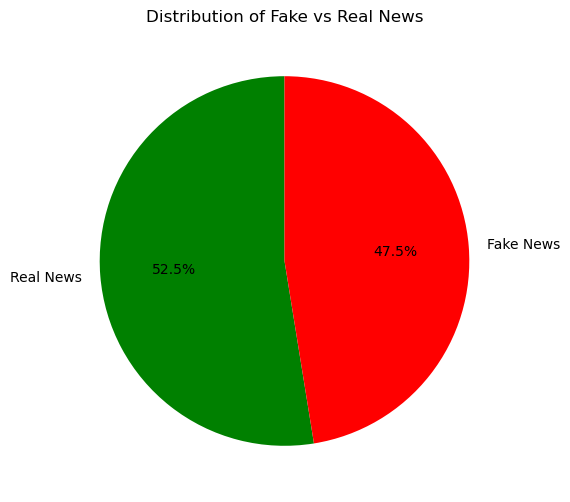

In [39]:
label_counts = data['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Real News', 'Fake News'], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Distribution of Fake vs Real News')
plt.show()

In [40]:
subject_counts = data['subject'].value_counts()
subject_counts

subject
politicsNews                                                                                                                                                                                                                                                                                    11219
worldnews                                                                                                                                                                                                                                                                                        9991
News                                                                                                                                                                                                                                                                                             9050
politics                                                                                                      

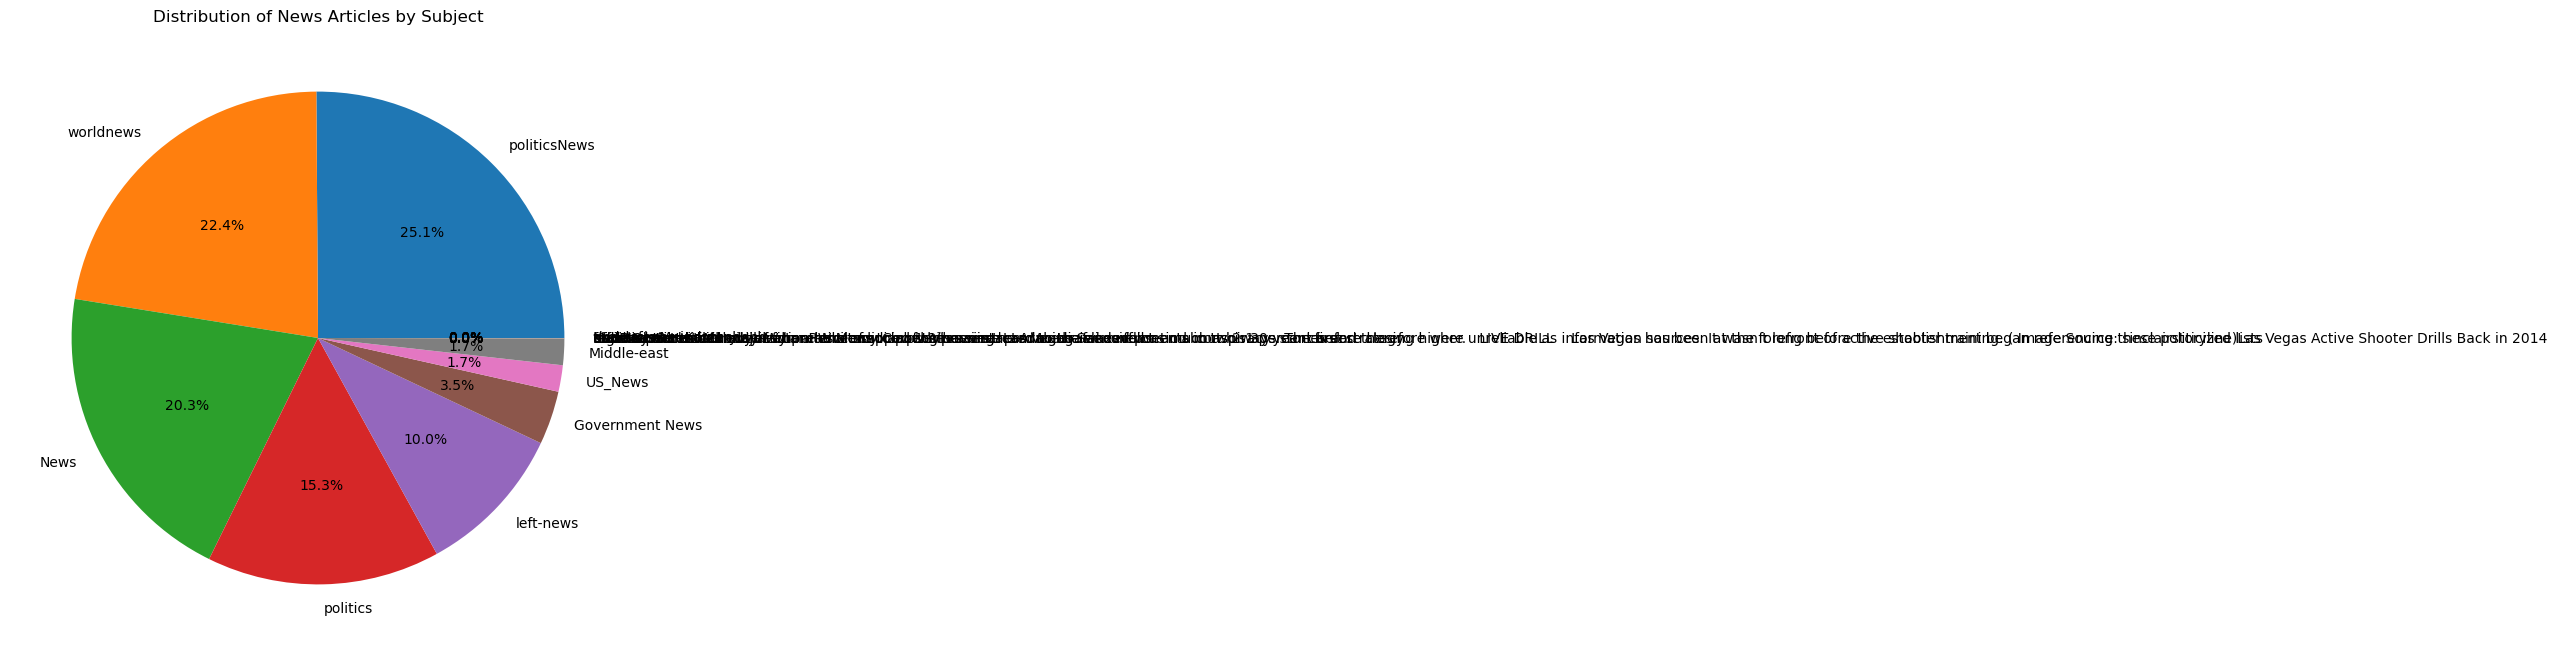

In [41]:
subject_counts = data['subject'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%')
plt.title('Distribution of News Articles by Subject')
plt.show()

###Histogram

In [42]:
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

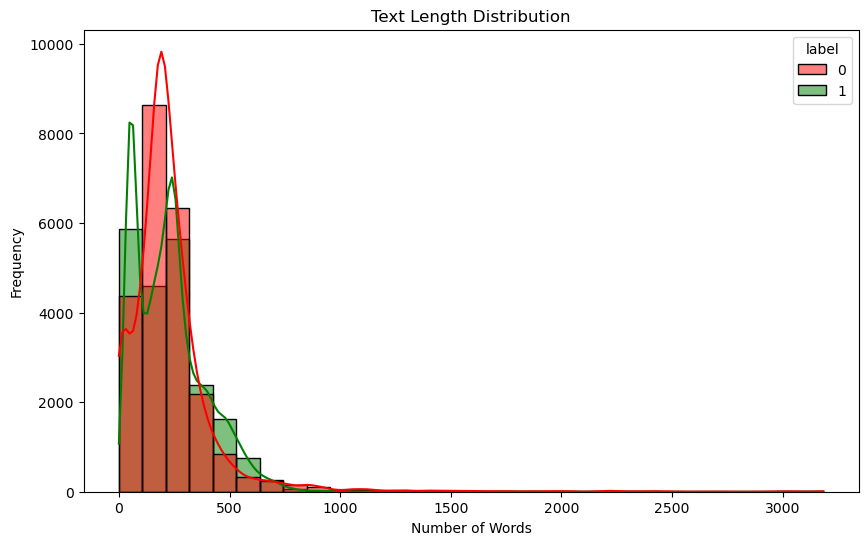

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', hue='label', bins=30, kde=True, palette={0: 'red', 1: 'green'})
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

- Label 0 (Fake News): Text lengths are shorter on average but have a higher frequency at lower word counts.
- Label 1 (Real News): Texts are generally longer, with a broader distribution across word counts.
- Both distributions peak at shorter lengths but differ slightly in spread, with real news being more verbose on average.

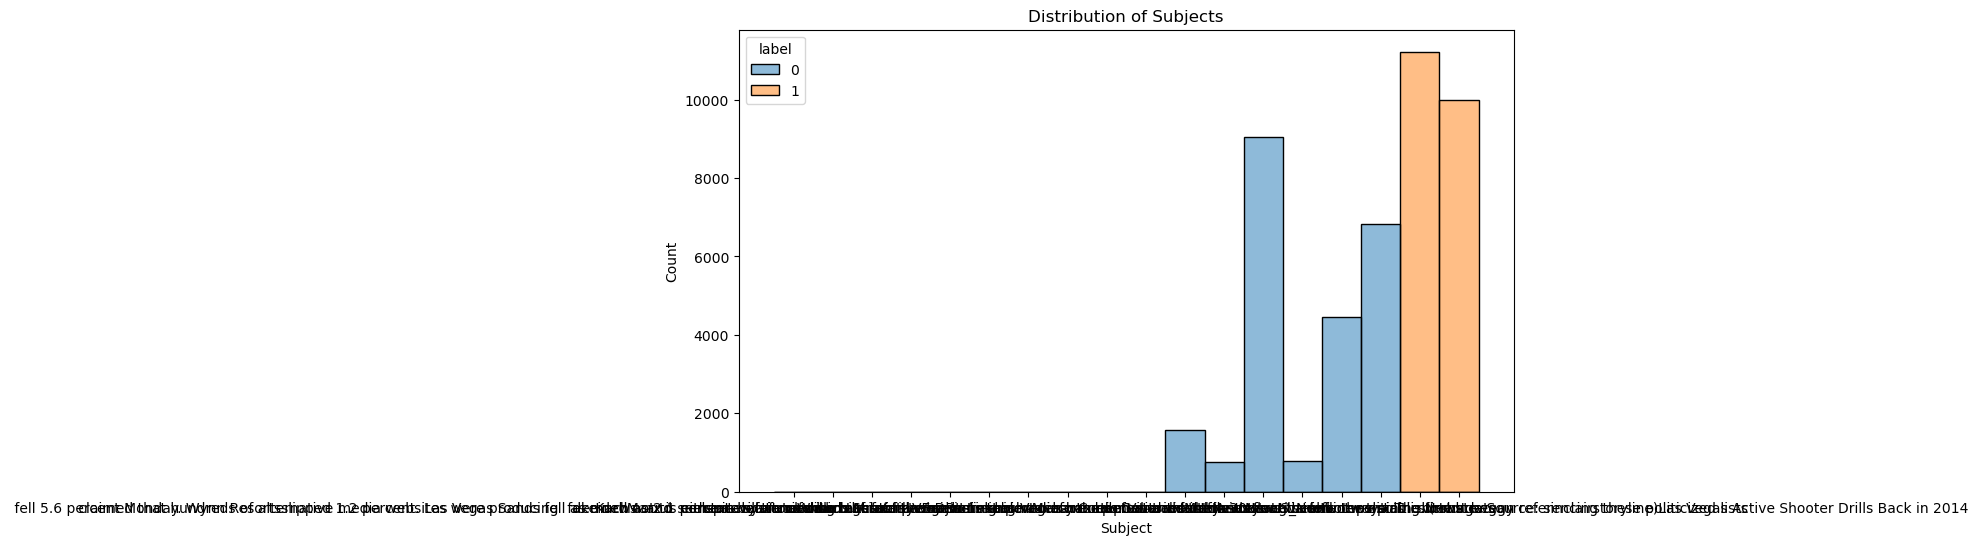

In [44]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='subject',hue='label')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

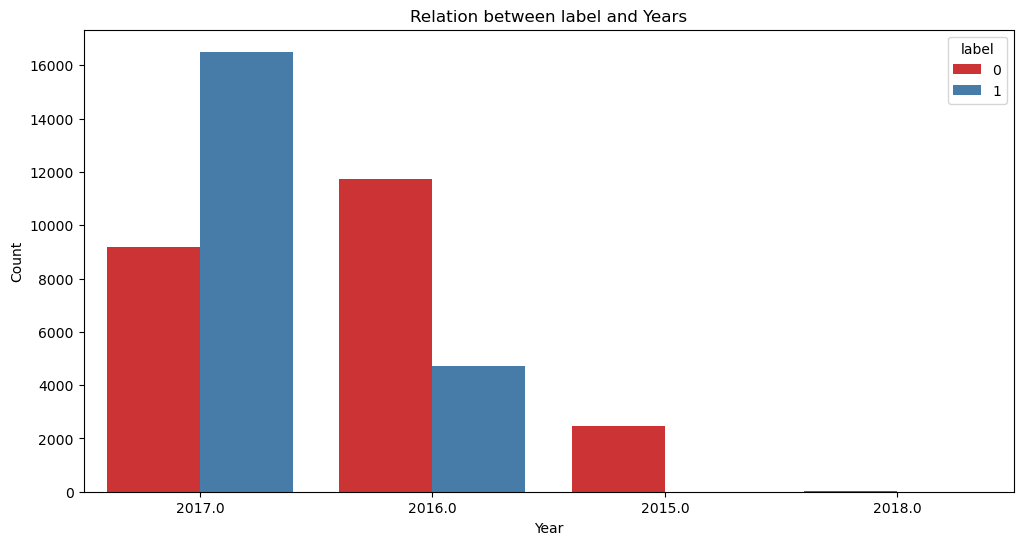

In [45]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index, palette='Set1',hue='label')
plt.title('Relation between label and Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

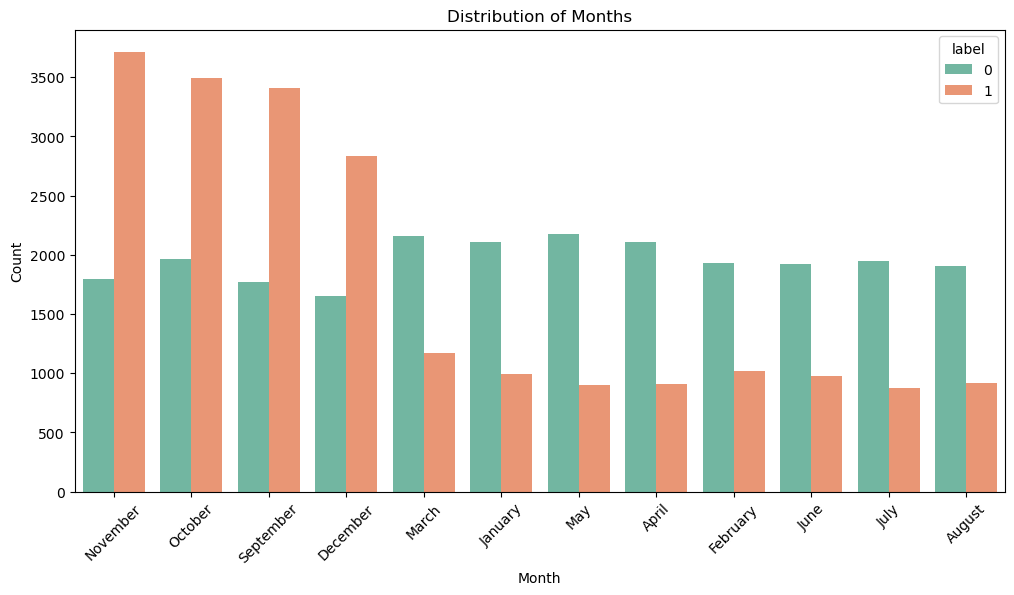

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, order=data['Month'].value_counts().index, palette='Set2',hue='label')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Model building

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [48]:
x=data['cleaned_text']
y=data['label']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Reduce features to 2000
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

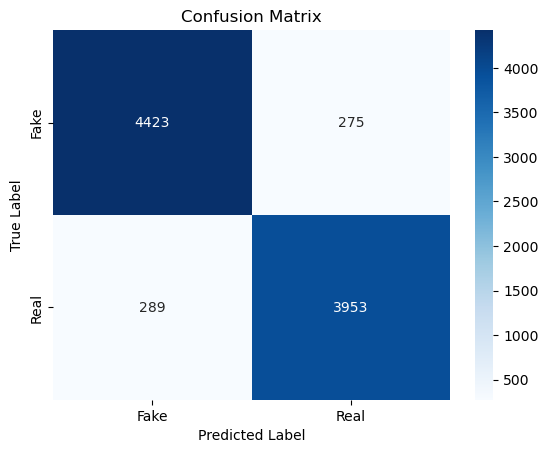

In [66]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [63]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Naive Bayes": MultinomialNB()
}

In [71]:
model_names = []
accuracies = []

In [72]:
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    model_names.append(model_name)
    accuracies.append(acc)

    print(f"{model_name} Accuracy: {acc:.2f}")

    # Classification Report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 0.99
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4698
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8940
   macro avg       0.99      0.99      0.99      8940
weighted avg       0.99      0.99      0.99      8940

Confusion Matrix for Logistic Regression:
[[4635   63]
 [  47 4195]]

Training Random Forest...
Random Forest Accuracy: 1.00
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4698
           1       1.00      1.00      1.00      4242

    accuracy                           1.00      8940
   macro avg       1.00      1.00      1.00      8940
weighted avg       1.00      1.00      1.00      8940

Confusion Matrix for Random Forest:
[[4688   10]
 [   7 4235]]

T

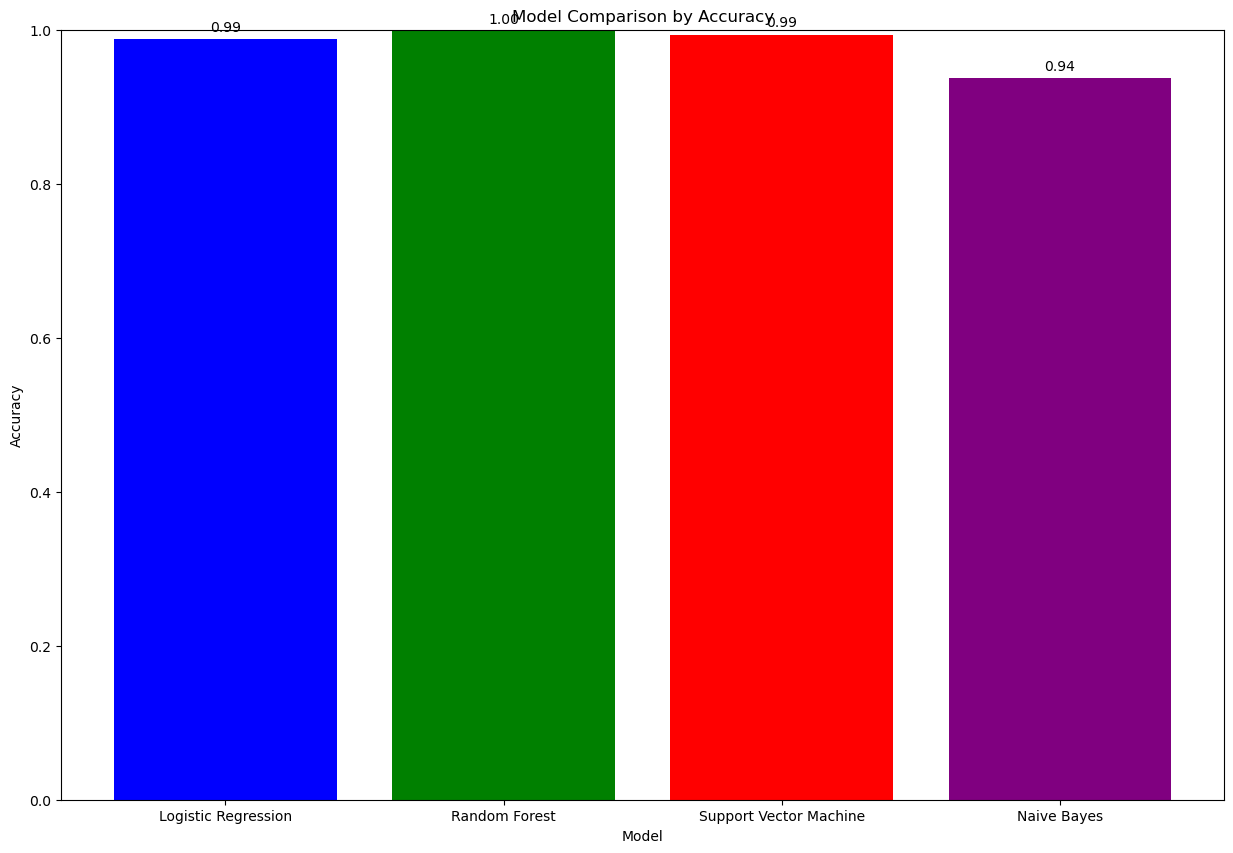

In [82]:
plt.figure(figsize=(15, 10))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison by Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=10)
plt.show()


## As per our visulation the most accurate model is RADNOM FOREST MODEL which give the accuracy of 100 percent 